In [ ]:
# 신경망학습 - 손실함수의 최저점을 찾아가는 과정 - 미분....기울기
# 최저점을 찾아가는 과정 - 최적화 문제
# SGD와 같은 계열을 옵티마이져  . 잡음과 변화가 아주 심해서 한계가 많다.. (표준으로 자리잡았었음)
# 모멘텀과 적응적 학습률 아이디어로 개선

In [ ]:
# 모멘텀 : 미니배치로 계산한 그레이디언트 정보만 사용
# 이전 미니배치에서 얻었던 방향정보 v를 같이 고려해서 잡음을 줄이는 역활
# 알파 : [0,1] 사이의 실수 알파가 0이면 SGD와 같고 1에 가까울수록 이전 그레이디언트 정보에 큰 가중치를 주게됨
# 알파 : 0.5 0.9등을 사용

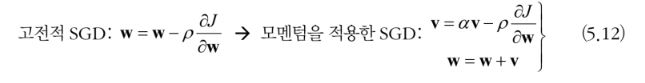

In [ ]:
# 모멘텀의 원리를 설명
# 검은 실선 : 검은실선은 이전 미니배치의 누적된 방향정보 V  점은 현재 가중치 벡터 w
# SGD는 빨간색 실선처럼 이동
# 모멘텀을 적용 : 현재 가중치 w를 파란실선으로 표신한 식을 이용해서 파란점으로 이동
# 네스테로프 : 더 개선된 방법을 제공. 현재위치에서 W에서 미분을 하는 대신에 이전정보V 와 움직임(알파)을 이용해서 av(알파브이) 예상되는 위치로 이동을 예상한 다음
# 그곳에서 미분을 함

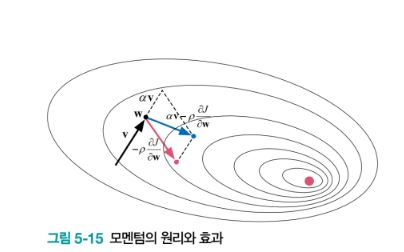

In [3]:
# SGD의 API
import tensorflow as tf
tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0,nesterov=False) # 디폴트
# learning_rate 수식에서 p 
# momentum : 알파
# nesterov 네스테로프 적용 유무

In [ ]:
# 적응적 학습률 ( learning rate)
# 그레이디언트 : 오류가 작아지는 방향을 지시,, 얼마나 이동해야 하는지에 대한 정보는 없다 
# SGD : 보수적인 학습률채택 
# P에 해당하는 학습률을 크게 그리고 작게 했을 경우 시각화
# 학습률이 크면 : 최저점을 지나치게 됨
# 학습률이 작으면 : over time

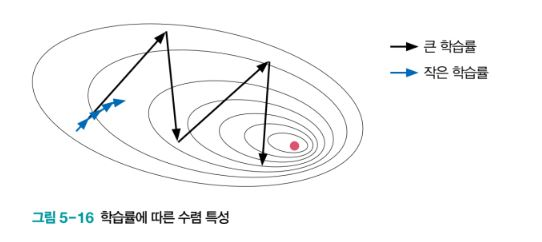

In [ ]:
# 적응적 학습률(learning rate) : 
# Adagrade : 이전 그레이던트의 누적된 정보를 이용해서 학습률을 설정
# RMSprop : 이전 그레이던트의 누적된 정보를 이용해서 학습률을 설정 하는데 오래된 정보의 가중치를 줄인다
# Adam : RMSprop + 모멘텀을 적용

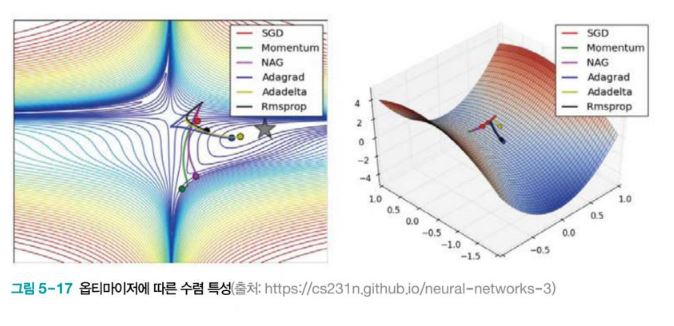

# fashion mnist 데이터를 가지고 위에 설명한 옵티마이저를 각각 적용해서 성능을 시각화

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.optimizers  import SGD, Adam,Adagrad,RMSprop
import matplotlib.pyplot as plt

In [ ]:
# 신경망을 설계 - 함수형태

In [6]:
# 신경망 입력형태로 데이터를 변환
(x_train,y_train),(x_test,y_test) =  fashion_mnist.load_data()
x_train = x_train.reshape(-1,28*28).astype('float32')/255.0
x_test = x_test.reshape(-1,28*28).astype('float32')/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [15]:
def makeModel(x_train,y_train,x_test,y_test,optimizer):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(1024,activation='relu',input_shape=(28*28,)))
    model.add(tf.keras.layers.Dense(512,activation='relu'))
    model.add(tf.keras.layers.Dense(512,activation='relu'))
    model.add(tf.keras.layers.Dense(512,activation='relu'))
    model.add(tf.keras.layers.Dense(10,activation='softmax'))
    model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer = optimizer,metrics=['acc'])
    hist = model.fit(x_train,y_train,batch_size=256,epochs=50,validation_data=(x_test,y_test),verbose=2)
    return model,hist

In [16]:
optimizers = [
    SGD(), Adam(),Adagrad(),RMSprop()
]

In [17]:
result = []
for opti in optimizers:
    result.append(makeModel(x_train,y_train,x_test,y_test,opti))

In [ ]:
plt.figure(figsize=(15,5))
optlistname = ['SGD', 'Adam','Adagrad','RMSprop']
colors = [('r','r--'),('g','g--'),('b','b--'),('m','m--')]
for idx,(mo,hist) in enumerate( result):
    plt.plot(hist.history['acc'],colors[idx][0],  label=optlistname[idx]+'_acc',)
    plt.plot(hist.history['val_acc'],colors[idx][1],label=optlistname[idx]+'_val_acc')  
plt.grid()
plt.legend()
plt.show()

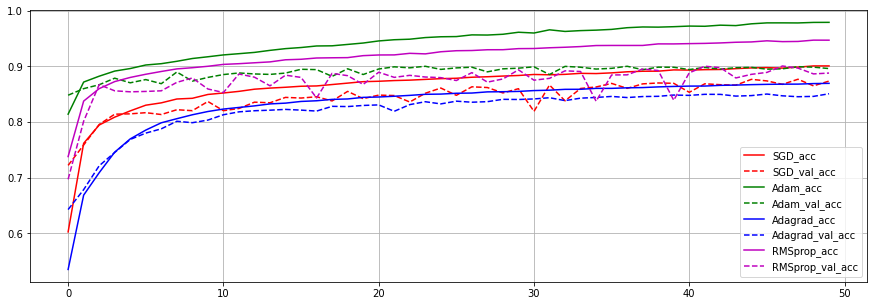